# Trabalho Final - Ciência de Dados - Enap / 2021 - Adonay Veiga

## Apresentação do Dataset
A base de dados utilizada nesta análise é um extrato de informações de acesso público do Sistema Integrado de Informações sobre Desastres - S2ID.

O S2ID foi instituído pela Portaria Nº 526, de 6 de setembro de 2012, a qual "Estabelece procedimentos para a solicitação de reconhecimento de Situação de Emergência ou de Estado de Calamidade Pública por meio do Sistema Integrado de Informações sobre Desastres - S2ID".

O pedido de Reconhecimento Federal é o procedimento pelo qual Estados e Municípios solicitam apoio complementar da Esfera Federal para resposta e reestabelecimento à desastres. Historicamente, desde sua instituição, o S2ID tem sido utilizado também para registro de ocorrências de desastres, independente do prosseguimento do pedido de Reconhecimento Federal. O S2ID inclui ainda dados de desastres anteriores a data de sua instituição, para fins de consolidação histórica.



### Link para Download do Dataset
As informações analisadas podem ser acessadas na [página do S2ID](https://s2id.mi.gov.br/paginas/relatorios/ "S2ID"), na seção **“Relatório Gerencial - Danos informados”**. Os dados são exportados diretamente em formato "xls". Por praticidade, os dados serão disponibilizados também no GitHub, assim como este caderno.

In [ ]:
# https://s2id.mi.gov.br/paginas/relatorios/
# https://github.com/AdonayVeiga/BootCamp-ENAP

## Motivação Pessoal
Os pedidos de Reconhecimento Federal são analisados e processados por Analistas do Centro Nacional de Gerenciamento de Riscos e Desastres – CENAD, órgão onde estou lotado. Apesar de minhas atribuições não estarem relacionadas à análise desses pedidos, estes dados podem ser relevantes ao estabelecimento das Políticas Públicas relacionadas a desastres.

## Investigação
O objetivo desta análise é avaliar o comportamento das variáveis **Danos Humanos** e **Danos Materiais** relacionadas aos desastres ocorridos nos últimos anos. Como Danos Humanos considera-se o quantitativo de pessoas afetadas pelo desastre, aqui incluídas pessoas feridas, enfermas, desaparecidas, desalojadas, desabrigadas, mortas ou outros. Por sua vez, Danos materiais são caracterizados pelo quantitativo de habitações, instalações públicas ou obras de infraestrutura danificada ou destruída na ocorrência do desastre.

Embora haja dados de danos provocados por desastres desde 1962, há uma mudança significativa na formatação a partir do ano de 2013, quando o uso do S2ID se tornou obrigatório para processamento de pedidos de Reconhecimento Federal (Portaria MI nº 025, de 25 de janeiro de 2013). Portanto, esta análise considerará os __desastres ocorridos entre 1º de janeiro de 2014 até 31 de dezembro de 2020.__ Note que a __data de registro__ do evento no S2ID pode ser diferente da __data de ocorrência__ do evento.

###*Bibliotecas*
A célula abaixo carrega todas as bibliotecas empregadas nesta análise.

In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

###*Obtendo os dados*
Por praticidade desta ferramenta, os dados do “Relatório Gerencial - Danos informados” no período de interesse estão dispostos em uma pasta do Google Drive. As células abaixo acessam a pasta em questão e recupera o caminho e nome dos arquivos de dados.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
files_path = glob('/content/drive/MyDrive/Dados/Danos_Informados_*.xls')
print(files_path)

['/content/drive/MyDrive/Dados/Danos_Informados_2018.xls', '/content/drive/MyDrive/Dados/Danos_Informados_2017.xls', '/content/drive/MyDrive/Dados/Danos_Informados_2016.xls', '/content/drive/MyDrive/Dados/Danos_Informados_2015.xls', '/content/drive/MyDrive/Dados/Danos_Informados_2014.xls', '/content/drive/MyDrive/Dados/Danos_Informados_2020.xls', '/content/drive/MyDrive/Dados/Danos_Informados_2019.xls']


###*Filtrando e combinando dados das tabelas*
As células abaixo abre os arquivos de dados, realiza a leitura dos dados relevantes, faz a agregação dos dados de danos humanos e materias, e a combinação em um único objeto de dados (do tipo DataFrame) para análise.

In [4]:
def extract_transform(file_path):
  ''' Extrai dados de danos humanos e materiais e consolida totais da tabela
      de Danos Informados
      
      file_path : caminho para o arquivo xls de dados
      
      Retorna DataFrame com dados de interesse consolidados
  '''
  # Colunas Gerais
  cols = ['UF',
          'COBRADE',
          'Registro',
          'Protocolo'
          ]
  # Colunas de Danos Humanos
  cols_DH = ['DH_Mortos',
             'DH_Feridos',
             'DH_Enfermos',
             'DH_Desabrigados',
             'DH_Desalojados',
             'DH_Desaparecidos',
             'DH_Outros Afetados'
             ]
  # Colunas de Danos Materias
  cols_DM = ['DM_Unidades Habitacionais Danificadas',
             'DM_Instalações públicas de saúde Danificadas',
             'DM_Instalações públicas de ensino Danificadas',
             'DM_Instalações públicas prestadoras de outros serviços Danificadas',
             'DM_Instalações públicas de uso comunitário Danificadas',
             'DM_Obras de infraestrutura pública Danificadas',
             'DM_Unidades Habitacionais Destruídas',
             'DM_Instalações públicas de saúde Destruídas',
             'DM_Instalações públicas de ensino Destruídas',
             'DM_Instalações públicas prestadoras de outros serviços Destruídas',
             'DM_Instalações públicas de uso comunitário Destruídas',
             'DM_Obras de infraestrutura pública Destruídas'
             ]
  # Abrindo e lendo os dados do arquivo
  df_danos = pd.read_excel(file_path, skiprows=4,usecols=cols+cols_DH+cols_DM)
  # Obtendo a data de ocorrência do desastre
  df_danos['Data'] = pd.to_datetime(df_danos['Protocolo'].str[-6:],format='%y%m%d')
  # Convertendo a data de registro do desastre no S2ID para o formato apropriado
  df_danos['Registro'] = pd.to_datetime(df_danos['Registro'],format='%d/%m/%Y')
  # Consolidando os dados de danos
  df_danos['Danos_Humanos'] = df_danos.loc[:,list(cols_DH)].sum(axis=1)
  df_danos['Danos_Materiais'] = df_danos.loc[:,list(cols_DM)].sum(axis=1)
  # Obtendo o ano de ocorrência do desastres para fins práticos
  df_danos['Ano'] = df_danos['Data'].apply(lambda x: x.year)
  # Descartando dados sem interesse para a análise
  df_danos.drop(columns = cols_DH + cols_DM + ['Protocolo'], inplace=True)
  return df_danos

In [5]:
all_data = []
for file in files_path:
  all_data.append(extract_transform(file))
# Concatenando dados em um único objeto de dados
df_danos = pd.concat(all_data)
# Liberando memória
del all_data

In [6]:
# Opcional
# checando dados carregados
df_danos.info()
df_danos.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35612 entries, 0 to 4125
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UF               35612 non-null  object        
 1   Registro         35612 non-null  datetime64[ns]
 2   COBRADE          35612 non-null  object        
 3   Data             35612 non-null  datetime64[ns]
 4   Danos_Humanos    35612 non-null  float64       
 5   Danos_Materiais  35612 non-null  float64       
 6   Ano              35612 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 2.2+ MB


,UF,Registro,COBRADE,Data,Danos_Humanos,Danos_Materiais,Ano
0,MG,2019-01-01,12100 - Inundações,2018-12-30,115.0,4.0,2018
1,ES,2018-12-30,12300 - Alagamentos,2018-12-30,0.0,0.0,2018
2,MG,2019-01-02,13214 - Tempestade Local/Convectiva - Chuvas I...,2018-12-30,300.0,4.0,2018
3,MG,2019-01-08,13214 - Tempestade Local/Convectiva - Chuvas I...,2018-12-29,0.0,0.0,2018
4,MG,2019-01-08,11420 - Erosão de Margem Fluvial,2018-12-29,500.0,0.0,2018


Alguns registros possuem **data de ocorrência fora do intervalo** de interesse, pois foram registrados (muito tempo) depois. Compare as colunas **Registro** e **Data** apresentadas abaixo. A célula remove essas ocorrências dos dados de análise.

In [7]:
print(len(df_danos))
rm_i = df_danos[(df_danos['Data'] > datetime(year=2020, month=12, day=31))
                | (df_danos['Data'] < datetime(year=2014, month=1, day=1))
                # | (df_danos['Data_registro'] > datetime(year=2020, month=12, day=31))
                # | (df_danos['Data_registro'] < datetime(year=2014, month=1, day=1))
               ]#.index
df_danos.drop(index=rm_i.index,inplace=True)
print(len(df_danos))
rm_i

35612
35598


,UF,Registro,COBRADE,Data,Danos_Humanos,Danos_Materiais,Ano
1803,PR,2015-08-27,13215 - Tempestade Local/Convectiva - Vendaval,1970-08-26,150.0,30.0,1970
1902,BA,2015-07-22,14110 - Estiagem,2012-03-01,0.0,0.0,2012


###*Análise das variáveis de estudo*
O gráfico abaixo apresenta a **média e o intervalo de confiança das duas variáveis em estudo ao longo dos anos de interesse**. Este gráfico não permite fazer afirmações acerca da correlação entre essas duas variáveis. De fato, **se considerarmos a totalidade dos dados disponíveis no intervalo de interesse, a correlação entre essas duas variáveis é de apenas 0,62 %**, conforme mostrado no mapa de calor que se segue.

Text(0, 0.5, 'Danos Materiais')

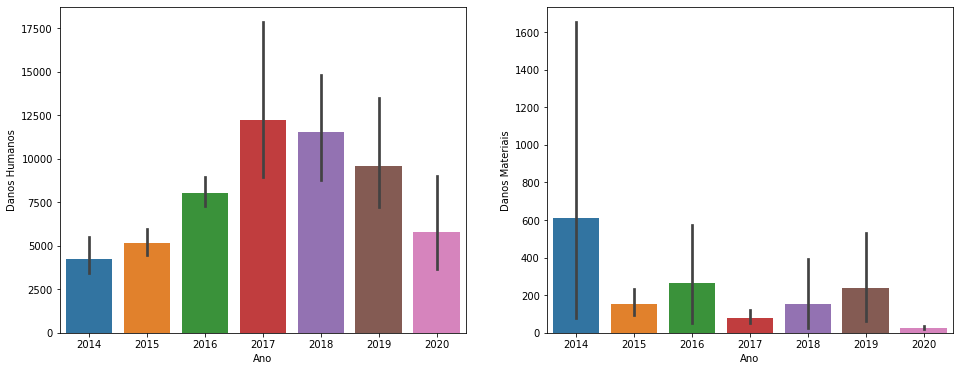

In [9]:
fig, ax = plt.subplots(figsize=(16,6),ncols=2)
g = sns.barplot(data=df_danos, x='Ano', y='Danos_Humanos', ax=ax[0])
g.set_ylabel('Danos Humanos')
g = sns.barplot(data=df_danos, x='Ano', y='Danos_Materiais', ax=ax[1])
g.set_ylabel('Danos Materiais')

[Text(0, 0.5, 'Danos Humanos'), Text(0, 1.5, 'Danos Materiais')]

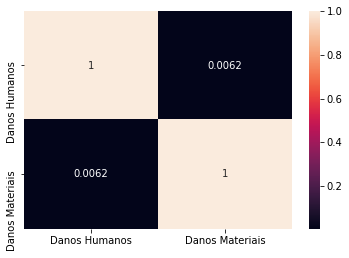

In [10]:
g = sns.heatmap(df_danos[['Danos_Humanos','Danos_Materiais']].corr(),annot=True)
g.set_xticklabels(['Danos Humanos','Danos Materiais'])
g.set_yticklabels(['Danos Humanos','Danos Materiais'])

No entanto, **agrupando-se os dados por tipologia do desastre** (coluna **COBRADE**), algumas correlações **se aproximam de 100%**. O gráfico abaixo apresenta **as maiores correlações positivas** entre as duas variáveis em estudo, de onde destacamos **as correlações acima de 60%**.

In [11]:
df_corr = df_danos.groupby('COBRADE')[['Danos_Humanos','Danos_Materiais']].corr()
df_corr.reset_index(inplace=True)
df_filtered = df_corr[(df_corr['level_1'] == 'Danos_Materiais') & (df_corr['Danos_Humanos'] > 0)]
df_filtered.sort_values('Danos_Humanos',ascending=False,inplace=True)
lst_todos = df_filtered['COBRADE']
lst_destaque = df_filtered[df_filtered['Danos_Humanos'] > 0.6]['COBRADE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


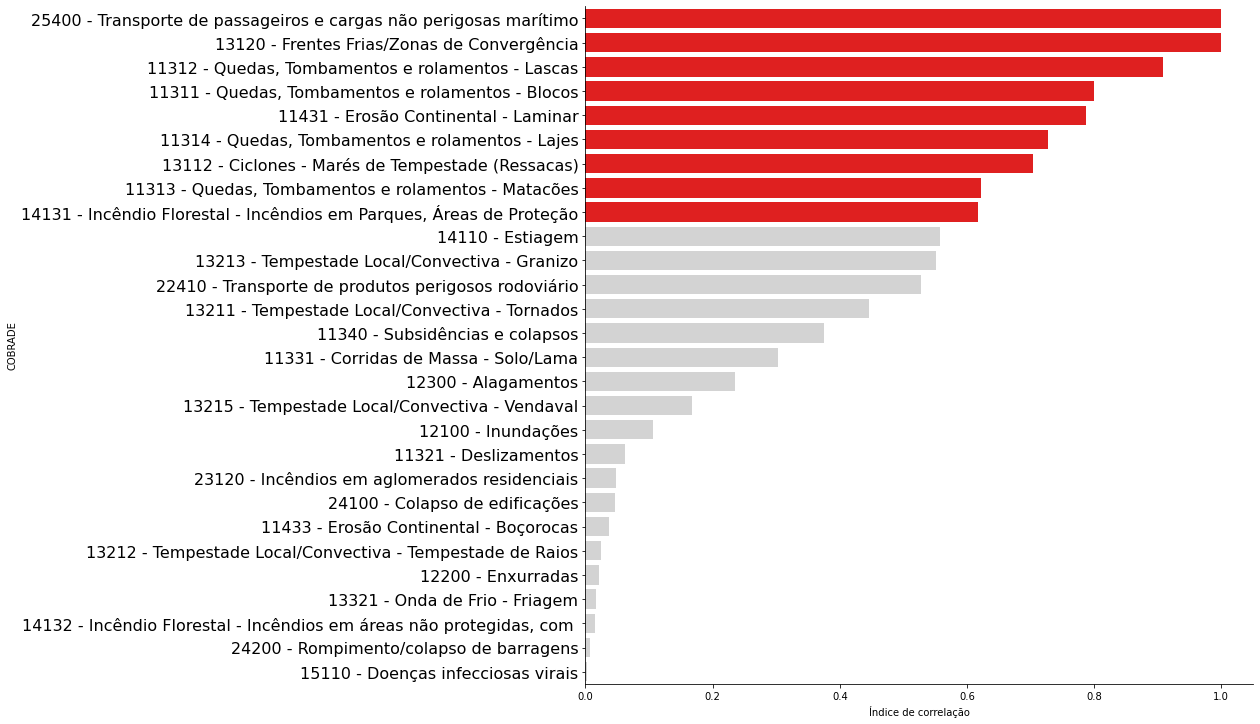

In [24]:
my_pal = {i: "lightgray" for i in lst_todos}
for t in lst_destaque:
  my_pal[t] = 'red'
g = sns.catplot(kind= 'bar',
                data= df_filtered,
                x= 'Danos_Humanos',
                y= 'COBRADE',
                orient= 'h',
                height= 10,
                palette= my_pal
                )
g.set_xlabels('Índice de correlação')
g.set_yticklabels([x[:68] for x in lst_todos],fontsize=16)

In [25]:
df_count = df_danos[df_danos['COBRADE'].isin(lst_destaque)].groupby(['UF','COBRADE']).agg({'Registro': 'count'})
df_2d = df_count.unstack(0,0)
df_2d['Total'] = df_2d.sum(1)
# df_2d.to_markdown()

O gráfico abaixo apresenta, **para cada tipologia de desastre** em destaque, o **quantitativo de registros** no intervalo de interesse, **agrupado por estado, além do total**.


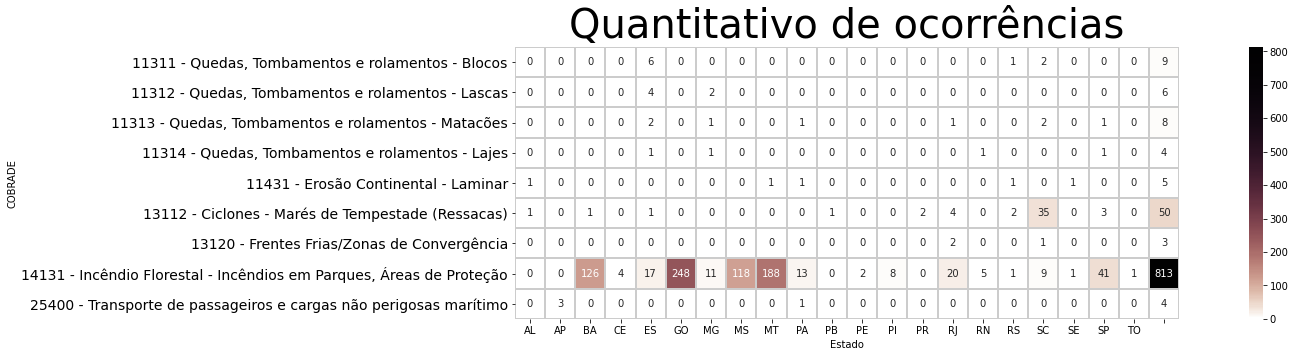

In [27]:
fig, ax = plt.subplots(figsize=(25,5))
p = sns.cubehelix_palette(light=1,as_cmap=True,start=3, gamma=3)
g = sns.heatmap(df_2d,
            annot=True,
            yticklabels=[x[:68] for x in df_2d.index],
            xticklabels=df_2d.columns.get_level_values(1),
            square=True,
            fmt='d',
            ax=ax,
            cmap=p,
            linewidths=1,
            linecolor='#ccc'
            )
g.set_title('Quantitativo de ocorrências',fontsize=40)
g.set_xlabel('Estado')
a = g.set_yticklabels(g.get_ymajorticklabels(),fontsize=14)

Vê-se que a **maioria das tipologias** em destaque **possuem poucos registros (menos que 50 registros)**, **o que não é suficiente** para corroborar, estatisticamente, a hipótese em estudo. Desta forma, destacam-se para análise as tipologias:

* 13112 - Ciclones - Marés de Tempestade (Ressacas); e
* 14131 - Incêndio Florestal - Incêndios em Parques, Áreas de Proteção Ambiental e Áreas de Preservação Permanente Nacionais, Estaduais ou Municipais.

## Conclusões e Achados

As principais conclusões e achados encontram-se resumidas na tabela abaixo. 

| Tipologia | Correlação | Ocorrências | Estados |
|:---------:|:----------:|:-----------:|:--------|
|13112 - Ciclones - Marés de Tempestade (Ressacas)|70,37 %|50|Santa Catarina|
|14131 - Incêndio Florestal - Incêndios em Parques, Áreas de Proteção Ambiental<br/>e Áreas de Preservação Permanente Nacionais, Estaduais ou Municipais|61,77 %|813|Goiás<br/>Mato Grosso<br/>Bahia<br/>Mato Grosso do Sul

As tipologias de desastre 13112 - Ciclones - Marés de Tempestade (Ressacas) e 14131 - Incêndio Florestal - Incêndios em Parques, Áreas de Proteção Ambiental e Áreas de Preservação Permanente Nacionais, Estaduais ou Municipais apresentam relevante correlação entre Danos Materiais e Danos Humanos, 70,37 % e 61,77 % respectivamente. Isto permite afirmar que evitar, mitigar ou impedir os danos materiais associados a ocorrência desses tipos de desastre significa salvaguardar a vida da população.

Relevante notar que os estados onde esses tipos de desastres são mais recorrentes são Santa Catarina, Goiás, Mato Grosso, Bahia e Mato Grosso do Sul; o que indica onde as ações e fomentos relacionados a prevenção desses desastres devem estar concentrados.
